<a href="https://colab.research.google.com/github/Dhavalkumar510/Uptrail/blob/main/Week_3_CPSWM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------
# Importing Libraries
-------------------

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score, f1_score, mean_squared_error, r2_score
)
from scipy.stats import chi2_contingency, ttest_ind
from pandas import get_dummies


-------------------
# Loading and Exploring the Data
-------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB
None
           user_id

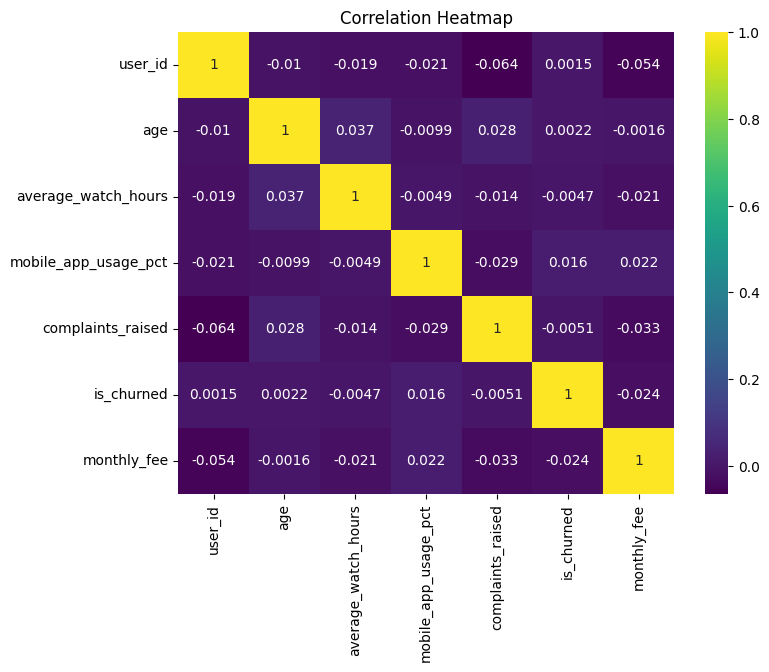

In [36]:
df = pd.read_csv("/content/streamworks_user_data.csv")

print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.head())

# Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

 -------------------
 # Data Cleaning
 -------------------

In [37]:
# # Convert date columns to datetime
# df['signup_date'] = pd.to_datetime(df['signup_date'])
# df['last_active_date'] = pd.to_datetime(df['last_active_date'])

# # Create tenure_days (difference between signup and last active)
# df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

# # Create is_loyal flag (True if tenure > 180 days)
# df['is_loyal'] = df['tenure_days'] > 180

# # Fill missing values
# df.fillna({'age': df['age'].median(), 'gender': 'Unknown', 'country': 'Unknown'}, inplace=True)

# # Encode categorical features using one-hot encoding
# df = pd.get_dummies(df, columns=['gender', 'country', 'subscription_type'], drop_first=True)

In [38]:
# 1. Convert date columns to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'])

# 2. Create tenure_days (difference between signup and last active date)
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

# 3. Create is_loyal (True if tenure_days > 180)
df['is_loyal'] = df['tenure_days'] > 180

# 4. Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['gender'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['subscription_type'].fillna('Unknown', inplace=True)

# 5. Encode categorical features
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['received_promotions'] = label_enc.fit_transform(df['received_promotions'])
df['referred_by_friend'] = label_enc.fit_transform(df['referred_by_friend'])
df['subscription_type'] = label_enc.fit_transform(df['subscription_type'])
df['country'] = label_enc.fit_transform(df['country'])

# 6. Double-check cleaned data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               1498 non-null   float64       
 1   age                   1500 non-null   float64       
 2   gender                1500 non-null   int64         
 3   signup_date           1498 non-null   datetime64[ns]
 4   last_active_date      1498 non-null   datetime64[ns]
 5   country               1500 non-null   int64         
 6   subscription_type     1500 non-null   int64         
 7   average_watch_hours   1496 non-null   float64       
 8   mobile_app_usage_pct  1498 non-null   float64       
 9   complaints_raised     1497 non-null   float64       
 10  received_promotions   1500 non-null   int64         
 11  referred_by_friend    1500 non-null   int64         
 12  is_churned            1499 non-null   float64       
 13  monthly_fee       

/tmp/ipython-input-4209983370.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_date'] = pd.to_datetime(df['signup_date'])
/tmp/ipython-input-4209983370.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-4209983370.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through

In [39]:
df.isnull().sum()

,0
user_id,2
age,0
gender,0
signup_date,2
last_active_date,2
country,0
subscription_type,0
average_watch_hours,4
mobile_app_usage_pct,2
complaints_raised,3


In [41]:
df.fillna({
    'signup_date': df['signup_date'].mode()[0],
    'last_active_date': df['last_active_date'].mode()[0],
    'user_id': 'Unknown',
    'age': df['age'].median(),
    'average_watch_hours': df['average_watch_hours'].mean(),
    'mobile_app_usage_pct': 0,
    'complaints_raised': 0,
    'is_churned': 0,
    'tenure_days': df['tenure_days'].median(),
    'gender': 'Unknown',
    'country': 'Unknown',
    'subscription_type': 'Unknown'
}, inplace=True)

df['monthly_fee'] = df.groupby('subscription_type')['monthly_fee'].transform(lambda x: x.fillna(x.median()))


In [46]:
df.isnull().sum()

,0
age,0
signup_date,0
last_active_date,0
average_watch_hours,0
mobile_app_usage_pct,0
complaints_raised,0
received_promotions,0
referred_by_friend,0
is_churned,0
monthly_fee,0


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# ==========================
# Convert date columns to datetime
# ==========================
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'])

# ==========================
# Create new features
# ==========================
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days
df['is_loyal'] = (df['tenure_days'] > 180).astype(int)
df['watch_per_fee_ratio'] = df['average_watch_hours'] / df['monthly_fee']
df['heavy_mobile_user'] = (df['mobile_app_usage_pct'] > 70).astype(int)

# ==========================
# Fill missing values (example: numeric fill with median)
# ==========================
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = ['gender', 'country', 'subscription_type', 'received_promotions']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# ==========================
# Encode categorical features using LabelEncoder
# ==========================
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# ==========================
# Scale numeric features (optional but useful)
# ==========================
scaler = MinMaxScaler()
df[['average_watch_hours', 'monthly_fee', 'tenure_days']] = scaler.fit_transform(
    df[['average_watch_hours', 'monthly_fee', 'tenure_days']]
)


In [50]:
df.shape

(1500, 29)

In [51]:
df.head()

,age,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,...,country_3,country_4,country_5,country_6,subscription_type_1,subscription_type_2,subscription_type_3,age_group,watch_time_group,promo_low_watch
0,56.0,2025-02-04,2025-07-13,0.530227,77.4,1.0,0,0,1.0,0.555556,...,False,False,False,False,False,True,False,Middle,Medium,0
1,69.0,2023-02-01,2025-07-13,0.816121,98.0,4.0,0,1,1.0,0.000000,...,True,False,False,False,False,False,False,Senior,High,0
2,46.0,2022-08-21,2025-07-13,0.498741,47.8,0.0,0,1,1.0,0.888889,...,False,True,False,False,True,False,False,Middle,Medium,0
3,32.0,2023-09-14,2025-07-13,0.066751,53.2,1.0,1,1,1.0,0.888889,...,False,False,False,False,True,False,False,Adult,Low,0
4,60.0,2023-07-29,2025-07-13,0.405542,16.8,5.0,0,1,0.0,0.444444,...,True,False,False,False,False,True,False,Middle,Medium,0


In [52]:
df.isnull().sum()

,0
age,0
signup_date,0
last_active_date,0
average_watch_hours,0
mobile_app_usage_pct,0
complaints_raised,0
received_promotions,0
referred_by_friend,0
is_churned,0
monthly_fee,0


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# ==========================
# Convert date columns to datetime
# ==========================
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'])

# ==========================
# 1️⃣ Create new features
# ==========================
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days
df['is_loyal'] = (df['tenure_days'] > 180).astype(int)
df['watch_per_fee_ratio'] = df['average_watch_hours'] / df['monthly_fee']
df['heavy_mobile_user'] = (df['mobile_app_usage_pct'] > 70).astype(int)

# ==========================
# 2️⃣ Handle missing values
# ==========================
# Numeric columns: fill with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical columns: fill with mode
categorical_cols = ['gender', 'country', 'subscription_type', 'received_promotions']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# ==========================
# 3️⃣ Encode categorical features
# ==========================
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])  # Label encoding (binary/ordinal)

# Example: one-hot encoding for subscription_type if needed
# df = pd.get_dummies(df, columns=['subscription_type'], drop_first=True)

# ==========================
# 4️⃣ Scale numeric variables (normalization)
# ==========================
scaler = MinMaxScaler()
df[['average_watch_hours', 'monthly_fee', 'tenure_days']] = scaler.fit_transform(
    df[['average_watch_hours', 'monthly_fee', 'tenure_days']]
)

# ==========================
# 5️⃣ Discretisation / Binning
# ==========================
df['age_group'] = pd.cut(df['age'], bins=[0,18,30,45,60,100], labels=['Teen','Young','Adult','Middle','Senior'])
df['watch_time_group'] = pd.cut(df['average_watch_hours'], bins=3, labels=['Low','Medium','High'])

# ==========================
# 6️⃣ Interaction features
# ==========================
df['promo_low_watch'] = np.where(
    (df['received_promotions'] == 1) & (df['average_watch_hours'] < df['average_watch_hours'].mean()),
    1, 0
)

# ==========================
# 7️⃣ Feature selection
# ==========================
# Drop redundant / low-variance columns
df.drop(['signup_date', 'last_active_date'], axis=1, inplace=True)


In [59]:
df.shape

(1500, 27)

In [68]:
df.head(10)

,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal,...,country_3,country_4,country_5,country_6,subscription_type_1,subscription_type_2,subscription_type_3,age_group,watch_time_group,promo_low_watch
0,56.0,0.530227,77.4,1.0,0,0,1.0,0.555556,0.214286,0,...,False,False,False,False,False,True,False,Middle,Medium,0
1,69.0,0.816121,98.0,4.0,0,1,1.0,0.000000,0.728291,1,...,True,False,False,False,False,False,False,Senior,High,0
2,46.0,0.498741,47.8,0.0,0,1,1.0,0.888889,0.843137,1,...,False,True,False,False,True,False,False,Middle,Medium,0
3,32.0,0.066751,53.2,1.0,1,1,1.0,0.888889,0.570728,1,...,False,False,False,False,True,False,False,Adult,Low,1
4,60.0,0.405542,16.8,5.0,0,1,0.0,0.444444,0.603641,1,...,True,False,False,False,False,True,False,Middle,Medium,0
5,25.0,0.497481,24.7,1.0,0,1,0.0,0.888889,0.627451,1,...,False,False,True,False,True,False,False,Young,Medium,0
6,38.0,0.721662,83.9,0.0,0,1,0.0,1.000000,0.718487,1,...,False,True,False,False,True,False,False,Adult,High,0
7,56.0,0.107053,35.6,5.0,0,1,0.0,1.000000,0.758403,1,...,False,False,False,False,True,False,False,Middle,Low,0
8,36.0,0.139798,82.7,1.0,0,1,0.0,0.444444,0.133754,0,...,False,True,False,False,False,True,False,Adult,Low,0
9,40.0,0.264484,70.9,5.0,1,1,0.0,0.111111,0.359944,1,...,False,False,False,False,False,False,False,Adult,Low,1


=== Chi-square Tests ===
received_promotions vs is_churned: chi2=12.219, p-value=0.0022
referred_by_friend vs is_churned: chi2=1.717, p-value=0.4238

=== T-test for Watch Hours ===
T-statistic=-0.186, p-value=0.8527


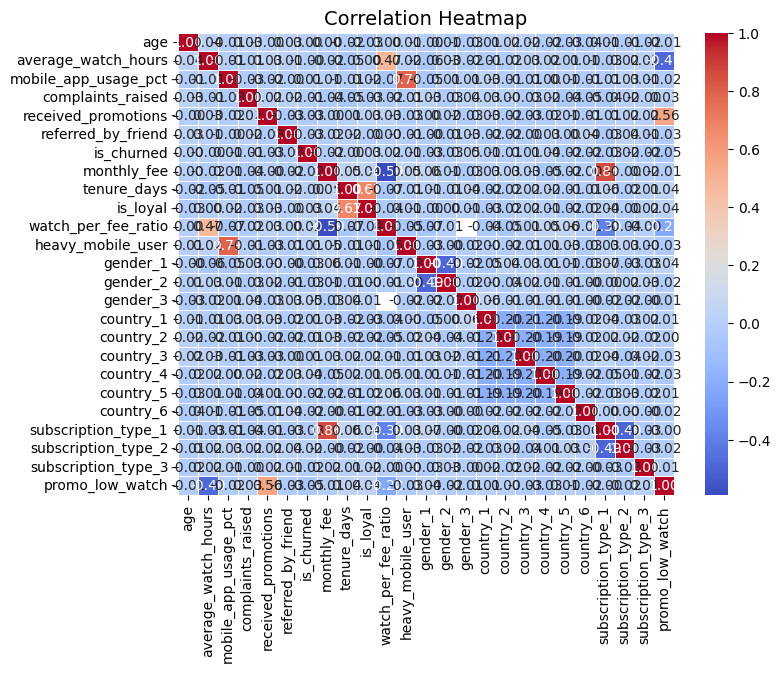

/tmp/ipython-input-4196952342.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=numeric_col, data=df, palette=["green","red"])


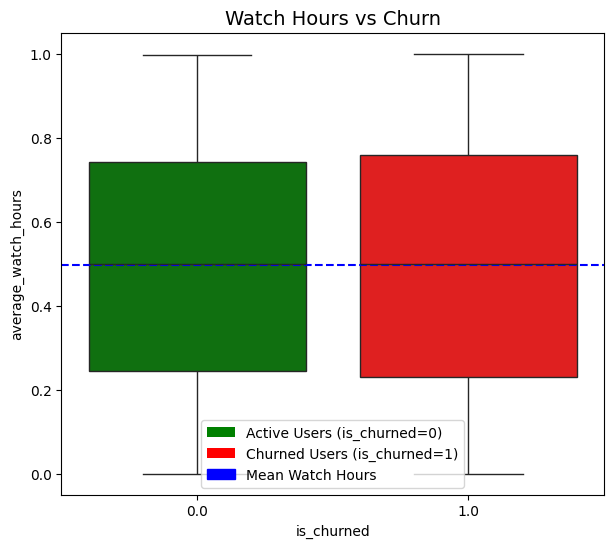

/tmp/ipython-input-4196952342.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set3")


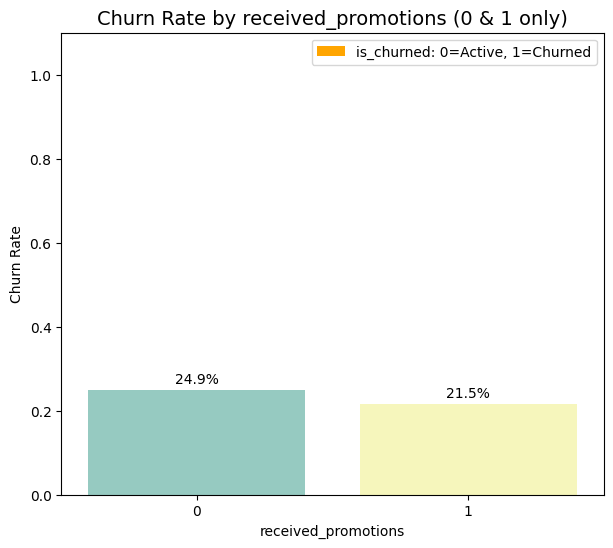

/tmp/ipython-input-4196952342.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set3")


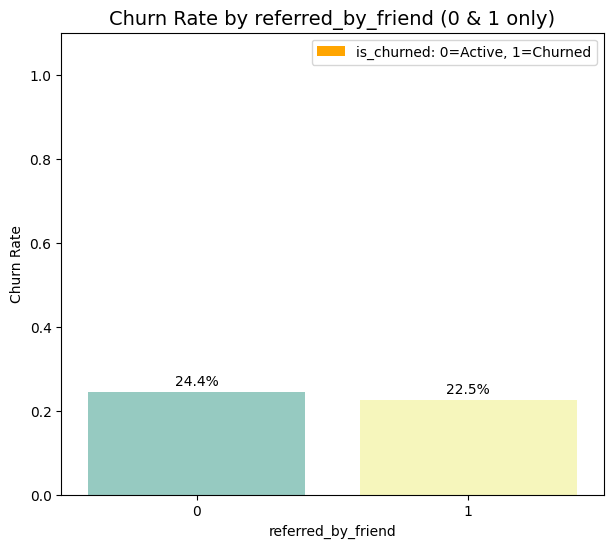

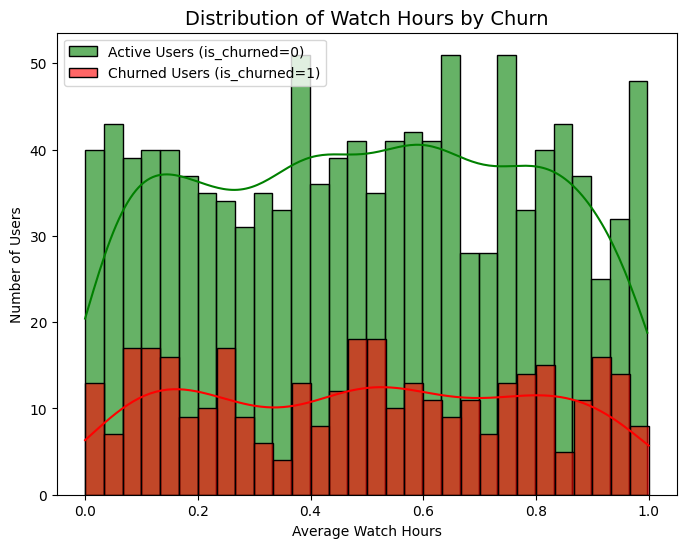

In [69]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ==========================
# Parameters
# ==========================
categorical_cols = ['gender', 'received_promotions', 'referred_by_friend']
numeric_col = 'average_watch_hours'
target_col = 'is_churned'

# ==========================
# 1️⃣ Chi-square tests
# ==========================
print("=== Chi-square Tests ===")
for col in categorical_cols:
    if col in df.columns:
        cont = pd.crosstab(df[col], df[target_col])
        chi2, p, _, _ = chi2_contingency(cont)
        print(f"{col} vs {target_col}: chi2={chi2:.3f}, p-value={p:.4f}")

# ==========================
# 2️⃣ T-test for watch hours
# ==========================
if numeric_col in df.columns:
    churned = df[df[target_col] == 1][numeric_col]
    retained = df[df[target_col] == 0][numeric_col]
    t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
    print("\n=== T-test for Watch Hours ===")
    print(f"T-statistic={t_stat:.3f}, p-value={p_val:.4f}")

# ==========================
# 3️⃣ Correlation analysis
# ==========================
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

# ==========================
# 4️⃣ Boxplot: Watch hours vs churn
# ==========================
plt.figure(figsize=(7,6))
sns.boxplot(x=target_col, y=numeric_col, data=df, palette=["green","red"])
plt.title('Watch Hours vs Churn', fontsize=14)
plt.axhline(df[numeric_col].mean(), color='blue', linestyle='--', label='Mean Watch Hours')

# Legend specific to this boxplot
plt.legend(handles=[
    Patch(facecolor='green', label='Active Users (is_churned=0)'),
    Patch(facecolor='red', label='Churned Users (is_churned=1)'),
    Patch(facecolor='blue', label='Mean Watch Hours', edgecolor='blue')
])
plt.show()
# ==========================
# 5️⃣ Barplots: Categorical vs churn (only 0 and 1 categories)
# ==========================
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(7,6))

        # Keep only 0 and 1 categories automatically
        churn_rate = df[df[col].isin([0,1])].groupby(col)[target_col].mean()

        ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set3")
        plt.title(f'Churn Rate by {col} (0 & 1 only)', fontsize=14)
        plt.ylabel('Churn Rate')

        # Annotate percentages
        for i, val in enumerate(churn_rate.values):
            ax.text(i, val + 0.01, f"{val*100:.1f}%", ha='center', va='bottom', fontsize=10)

        # Legend
        plt.legend([Patch(facecolor='orange')], [f"{target_col}: 0=Active, 1=Churned"])
        plt.ylim(0, 1.1)

        # Set x-ticks for available categories (0 and 1)
        ax.set_xticks(range(len(churn_rate.index)))
        ax.set_xticklabels(churn_rate.index)

        plt.show()

# ==========================
# 6️⃣ Histogram: Watch hours distribution by churn
# ==========================
plt.figure(figsize=(8,6))
bins = 30
sns.histplot(df[df[target_col]==0][numeric_col], color='green', label='Active Users (is_churned=0)', kde=True, alpha=0.6, bins=bins)
sns.histplot(df[df[target_col]==1][numeric_col], color='red', label='Churned Users (is_churned=1)', kde=True, alpha=0.6, bins=bins)
plt.title('Distribution of Watch Hours by Churn', fontsize=14)
plt.xlabel('Average Watch Hours')
plt.ylabel('Number of Users')
plt.legend()
plt.show()


In [48]:
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days
df['is_loyal'] = (df['tenure_days'] > 180).astype(int)
df['watch_per_fee_ratio'] = df['average_watch_hours'] / df['monthly_fee']
df['heavy_mobile_user'] = (df['mobile_app_usage_pct'] > 70).astype(int)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['average_watch_hours', 'monthly_fee', 'tenure_days']] = scaler.fit_transform(
    df[['average_watch_hours', 'monthly_fee', 'tenure_days']]
)

df = pd.get_dummies(df, columns=['gender', 'country', 'subscription_type'], drop_first=True)

df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['Teen', 'Young', 'Adult', 'Middle', 'Senior'])
df['watch_time_group'] = pd.cut(df['average_watch_hours'], bins=3, labels=['Low', 'Medium', 'High'])

df['promo_low_watch'] = np.where((df['received_promotions'] == 'Yes') & (df['average_watch_hours'] < df['average_watch_hours'].mean()), 1, 0)

# df.drop(['user_id'], axis=1, inplace=True)


KeyError: "None of [Index(['gender', 'country', 'subscription_type'], dtype='object')] are in the [columns]"

In [43]:
df.shape

(1500, 29)

In [44]:
df.head()

,age,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,...,country_3,country_4,country_5,country_6,subscription_type_1,subscription_type_2,subscription_type_3,age_group,watch_time_group,promo_low_watch
0,56.0,2025-02-04,2025-07-13,0.530227,77.4,1.0,0,0,1.0,0.555556,...,False,False,False,False,False,True,False,Middle,Medium,0
1,69.0,2023-02-01,2025-07-13,0.816121,98.0,4.0,0,1,1.0,0.000000,...,True,False,False,False,False,False,False,Senior,High,0
2,46.0,2022-08-21,2025-07-13,0.498741,47.8,0.0,0,1,1.0,0.888889,...,False,True,False,False,True,False,False,Middle,Medium,0
3,32.0,2023-09-14,2025-07-13,0.066751,53.2,1.0,1,1,1.0,0.888889,...,False,False,False,False,True,False,False,Adult,Low,0
4,60.0,2023-07-29,2025-07-13,0.405542,16.8,5.0,0,1,0.0,0.444444,...,True,False,False,False,False,True,False,Middle,Medium,0


=== Chi-square Tests ===
Column 'gender' not found.
received_promotions vs is_churned: chi2=12.219, p-value=0.0022
referred_by_friend vs is_churned: chi2=1.717, p-value=0.4238

=== T-test for Watch Hours ===
T-statistic=-0.186, p-value=0.8527

=== Correlation Matrix ===
                           age  average_watch_hours  mobile_app_usage_pct  \
age                   1.000000             0.036712             -0.011205   
average_watch_hours   0.036712             1.000000             -0.005356   
mobile_app_usage_pct -0.011205            -0.005356              1.000000   
complaints_raised     0.028211            -0.013081             -0.028082   
received_promotions  -0.000448             0.029148             -0.024636   
referred_by_friend    0.029295             0.013654             -0.000049   
is_churned            0.002247            -0.004837              0.011926   
monthly_fee           0.002319            -0.017541              0.010509   
tenure_days          -0.015266      

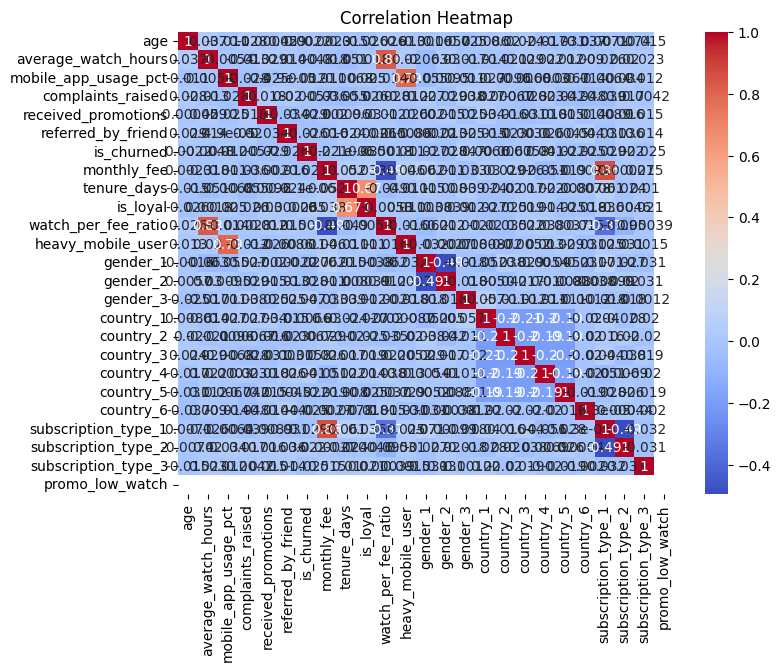

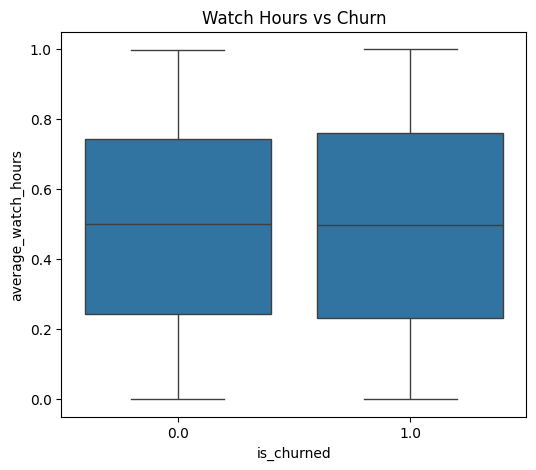

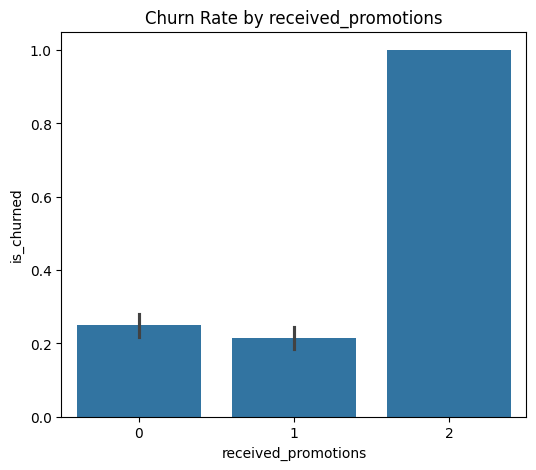

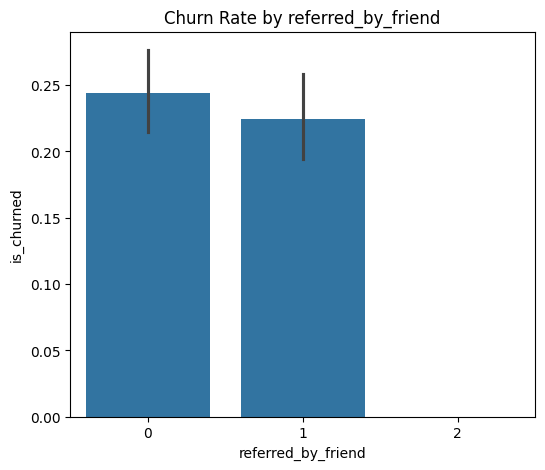

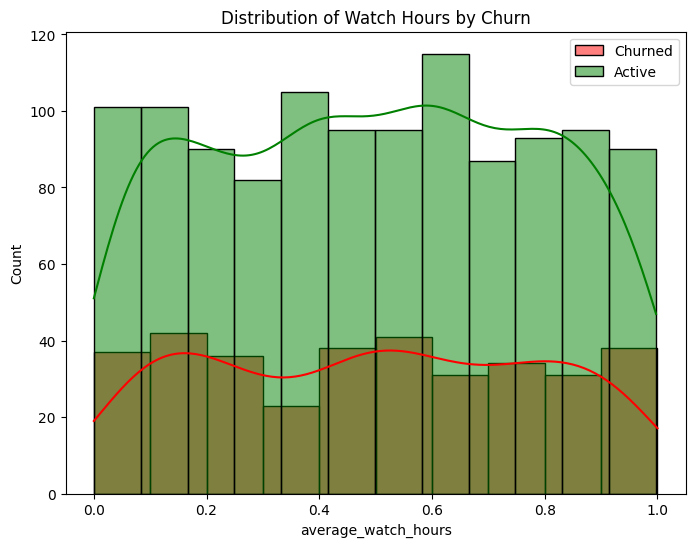

In [29]:
# Import libraries
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================
# Load your DataFrame
# ==========================
# df = pd.read_csv('your_file.csv')

# Make column names lowercase for consistency
df.columns = df.columns.str.lower()

# Define columns
categorical_cols = ['gender', 'received_promotions', 'referred_by_friend']
numeric_col = 'average_watch_hours'
target_col = 'is_churned'

# ==========================
# Chi-square tests
# ==========================
print("=== Chi-square Tests ===")
for col in categorical_cols:
    if col in df.columns:
        cont = pd.crosstab(df[col], df[target_col])
        chi2, p, _, _ = chi2_contingency(cont)
        print(f"{col} vs {target_col}: chi2={chi2:.3f}, p-value={p:.4f}")
    else:
        print(f"Column '{col}' not found.")

# ==========================
# T-test for watch time
# ==========================
if numeric_col in df.columns:
    churned = df[df[target_col] == 1][numeric_col]
    retained = df[df[target_col] == 0][numeric_col]
    t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
    print("\n=== T-test for Watch Hours ===")
    print(f"T-statistic={t_stat:.3f}, p-value={p_val:.4f}")
else:
    print(f"Column '{numeric_col}' not found.")

# ==========================
# Correlation analysis
# ==========================
print("\n=== Correlation Matrix ===")
corr = df.corr(numeric_only=True)
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ==========================
# Visualizations
# ==========================

# Boxplot: Watch hours vs churn
if numeric_col in df.columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(x=target_col, y=numeric_col, data=df)
    plt.title('Watch Hours vs Churn')
    plt.show()

# Barplots: Categorical variables vs churn
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(6,5))
        sns.barplot(x=col, y=target_col, data=df)
        plt.title(f'Churn Rate by {col}')
        plt.show()

# Histogram: Distribution of watch hours by churn
if numeric_col in df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df[df[target_col]==1][numeric_col], color='red', label='Churned', kde=True)
    sns.histplot(df[df[target_col]==0][numeric_col], color='green', label='Active', kde=True)
    plt.legend()
    plt.title('Distribution of Watch Hours by Churn')
    plt.show()


In [ ]:
# Check column names first
print(df.columns.tolist())

# Rename columns if needed (case-insensitive and remove spaces)
df.columns = df.columns.str.strip().str.lower()

# Convert date columns
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
df['last_active_date'] = pd.to_datetime(df['last_active_date'], errors='coerce')

# Create new features
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days
df['is_loyal'] = (df['tenure_days'] > 180).astype(int)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in ['received_promotions', 'referred_by_friend']:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col].astype(str))

# Only one-hot encode if the columns exist
categorical_cols = [c for c in ['subscription_type', 'gender', 'country'] if c in df.columns]
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    print("⚠️ No categorical columns found for one-hot encoding.")

# Handle missing values
df['tenure_days'].fillna(df['tenure_days'].median(), inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

print("✅ Data cleaned and prepared successfully!")


['user_id', 'age', 'signup_date', 'last_active_date', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised', 'received_promotions', 'referred_by_friend', 'is_churned', 'monthly_fee', 'tenure_days', 'is_loyal', 'watch_per_fee_ratio', 'heavy_mobile_user', 'subscription_type_Premium', 'subscription_type_Standard', 'gender_Male', 'gender_Other', 'country_France', 'country_Germany', 'country_India', 'country_UK', 'country_USA', 'promo_low_watch', 'watch_time_group']
⚠️ No categorical columns found for one-hot encoding.
✅ Data cleaned and prepared successfully!


/tmp/ipython-input-4036327824.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tenure_days'].fillna(df['tenure_days'].median(), inplace=True)


In [ ]:
df.head()

,user_id,age,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,...,subscription_type_standard,gender_male,gender_other,country_france,country_germany,country_india,country_uk,country_usa,promo_low_watch,watch_time_group
0,1001.0,0.813916,2025-02-04,2025-07-13,0.117507,0.910068,1.0,0,0,1.0,...,True,False,True,True,False,False,False,False,0,Low
1,1002.0,1.676912,2023-02-01,2025-07-13,1.107046,1.631570,4.0,0,0,1.0,...,False,True,False,False,False,True,False,False,0,Low
2,1003.0,0.150073,2022-08-21,2025-07-13,0.008527,-0.126653,0.0,0,0,1.0,...,False,True,False,False,False,False,True,False,0,Low
3,1004.0,-0.779308,2023-09-14,2025-07-13,-1.486680,0.062479,1.0,0,0,1.0,...,False,False,True,False,True,False,False,False,0,NaN
4,1005.0,1.079453,2023-07-29,2025-07-13,-0.314054,-1.212408,5.0,0,0,0.0,...,True,False,False,False,False,True,False,False,0,NaN


In [ ]:
# 3. Feature Engineering (Optional)

# Create additional features
df['watch_per_fee_ratio'] = df['average_watch_hours'] / df['monthly_fee']
df['heavy_mobile_user'] = df['mobile_app_usage_pct'] > 70
df['promo_low_watch'] = (df['received_promotions'] == 1) & (df['average_watch_hours'] < df['average_watch_hours'].median())

# Discretisation: create watch time buckets
bins = [0, 10, 30, 60, 120]
labels = ['Low', 'Medium', 'High', 'Very High']
df['watch_time_group'] = pd.cut(df['average_watch_hours'], bins=bins, labels=labels, include_lowest=True)

# Encode boolean features
df['is_loyal'] = df['is_loyal'].astype(int)
df['heavy_mobile_user'] = df['heavy_mobile_user'].astype(int)
df['promo_low_watch'] = df['promo_low_watch'].astype(int)

# Optional normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['age', 'monthly_fee', 'average_watch_hours', 'mobile_app_usage_pct', 'tenure_days']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("✅ Feature engineering complete!")


✅ Feature engineering complete!


In [ ]:
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
df['last_active_date'] = pd.to_datetime(df['last_active_date'], errors='coerce')

# Handle missing values
df['received_promotions'].fillna('No', inplace=True)
df['referred_by_friend'].fillna('No', inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

df.head()

df.isnull().sum()

/tmp/ipython-input-2179805007.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['received_promotions'].fillna('No', inplace=True)
/tmp/ipython-input-2179805007.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,0
user_id,0
age,0
gender,1
signup_date,2
last_active_date,2
country,3
subscription_type,3
average_watch_hours,0
mobile_app_usage_pct,0
complaints_raised,0


In [ ]:
df.head()

,user_id,age,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,...,subscription_type_standard,gender_male,gender_other,country_france,country_germany,country_india,country_uk,country_usa,promo_low_watch,watch_time_group
0,1001.0,0.813916,2025-02-04,2025-07-13,0.117507,0.910068,1.0,0,0,1.0,...,True,False,True,True,False,False,False,False,0,Low
1,1002.0,1.676912,2023-02-01,2025-07-13,1.107046,1.631570,4.0,0,0,1.0,...,False,True,False,False,False,True,False,False,0,Low
2,1003.0,0.150073,2022-08-21,2025-07-13,0.008527,-0.126653,0.0,0,0,1.0,...,False,True,False,False,False,False,True,False,0,Low
3,1004.0,-0.779308,2023-09-14,2025-07-13,-1.486680,0.062479,1.0,0,0,1.0,...,False,False,True,False,True,False,False,False,0,NaN
4,1005.0,1.079453,2023-07-29,2025-07-13,-0.314054,-1.212408,5.0,0,0,0.0,...,True,False,False,False,False,True,False,False,0,NaN


In [ ]:
df.shape

(1500, 26)

In [ ]:
# 5. Encode Categorical Features
df['received_promotions'] = df['received_promotions'].map({'Yes': 1, 'No': 0})
df['referred_by_friend'] = df['referred_by_friend'].map({'Yes': 1, 'No': 0})
df['is_loyal'] = df['is_loyal'].astype(int)
df['heavy_mobile_user'] = df['heavy_mobile_user'].astype(int)

# One-hot encode categorical columns
# df = pd.get_dummies(df, columns=['subscription_type', 'gender', 'country'], drop_first=True)